# Case study 4: Settlement types

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Sum of frequency per site per year in types/site date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Site count per year in types/site date ranges</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">RAAD type number count per site per year in types/site date ranges</span>](#5)  <a id="five"></a>  
6. [<span style="color:black">Plot line graphs</span>](#6) <a id="six"></a>  

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../../src")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import year_object_count_df, sum_freq_per_year, year_freq_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../data/RAAD_data_restructured.csv")
data["origin_h2"] = data["origin_h2"].fillna('')

In [3]:
major_site_type = ["military", "settlement/ military", "settlement", "villa"]
start_dates = ["raad_type_start_date", "site_start_date"]
end_dates = ["raad_type_end_date", "site_end_date"]

freq_type_dates = {}
freq_site_dates = {}

site_count_type_dates = {}
site_count_site_dates = {}

raad_type_count_type_dates = {}
raad_type_count_site_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Sum of frequency site per year in types/site date ranges</span>](#three) <a id="3"></a>

In [4]:
for site in major_site_type:
    for start, end in zip(start_dates, end_dates):

        df = data.groupby(["RAAD_form", start, end, "major_site_type"])["frequency"].sum()
        df = df.reset_index()
        df = df.rename(columns = {"frequency":"summed_freq"})

        df1 = sum_freq_per_year(data = df,
                                sum_freq = "summed_freq",
                                lower_date = start,
                                upper_date = end)
        

        freq = year_freq_df(data = df1[df1["major_site_type"] == site],     
                            lower_date = start,
                            upper_date = end,
                            sum_freq = "Sum_freq_per_year")   
        
        if site == "settlement/ military":
            label = "Settlement/Military (Augst)"
        else:
            label = site.capitalize()
        
        if "raad" in start or "raad" in  end:   
            freq_type_dates[label] = freq
        else:
            freq_site_dates[label] = freq
            
list_of_dfs.append(freq_type_dates)
list_of_dfs.append(freq_site_dates)

### [<span style="color:black">4. Site count per year in types/site date ranges</span>](#four) <a id="4"></a>  

In [5]:
for site in major_site_type:
    for start, end in zip(start_dates, end_dates):
        df = data.groupby(["RAAD_form", start, end, "major_site_type"])["site_name_modern"].apply(lambda x: ",".join(x))
        df = df.apply(lambda x: x.split(','))
        df = df.reset_index()
        df = df.rename(columns = {"site_name_modern":"List_of_sites"})

        count_sites = year_object_count_df(data = df[df["major_site_type"] == site],
                                           lower_date = start,  
                                           upper_date = end,
                                           object_list = "List_of_sites") 
                                           
        if site == "settlement/ military":
            label = "Settlement/Military (Augst)"
        else:
            label = site.capitalize()

        if "raad" in start or "raad" in  end:   
            site_count_type_dates[label] = count_sites
        else:
            site_count_site_dates[label] = count_sites

list_of_dfs.append(site_count_type_dates)
list_of_dfs.append(site_count_site_dates)

### [<span style="color:black">5. RAAD type number count per site per year in types/site date ranges</span>](#five) <a id="5"></a>

In [6]:
for site in major_site_type:
    for start, end in zip(start_dates, end_dates):
        df = data.groupby(["RAAD_form", start, end, "major_site_type"])["RAAD_type_number"].apply(list)
        df = df.reset_index()
        df = df.rename(columns = {"RAAD_type_number":"List_of_numbers"})

        type_count = year_object_count_df(data = df[df["major_site_type"] == site], 
                                          lower_date = start,  
                                          upper_date = end,
                                          object_list = "List_of_numbers")  
        if site == "settlement/ military":
            label = "Settlement/Military (Augst)"
        else:
            label = site.capitalize()

        if "raad" in start or "raad" in end:   
            raad_type_count_type_dates[label] = type_count
        else:
            raad_type_count_site_dates[label] = type_count
            
list_of_dfs.append(raad_type_count_type_dates)
list_of_dfs.append(raad_type_count_site_dates)

### [<span style="color:black">6. Plot line graphs</span>](#six) <a id="6"></a>

/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_13255/2802863464.py:22: UserWarning: FixedFormatte

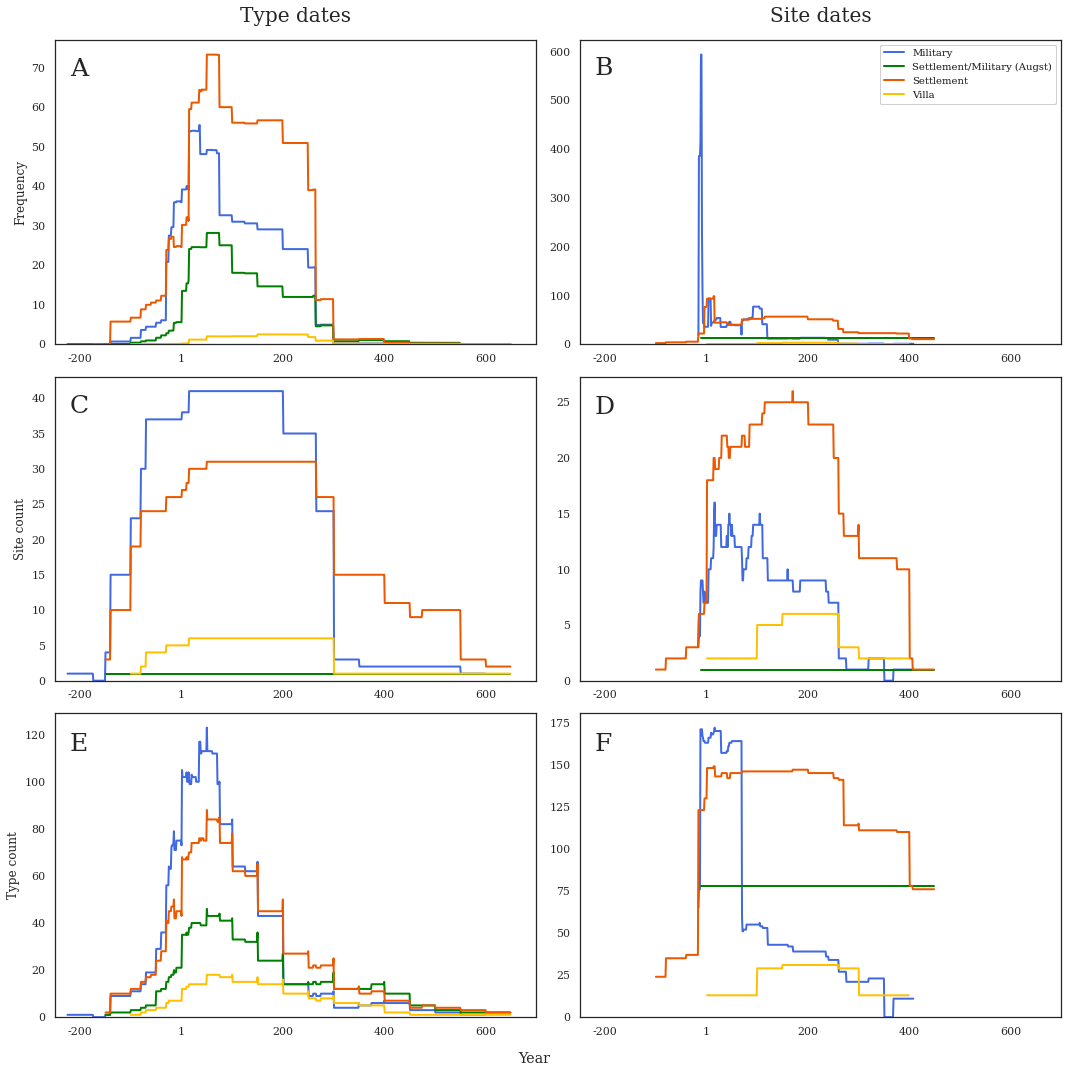

In [23]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 
fig, axs= plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axs[0, 0].set_xlim([-250, 700])
axs[0, 1].set_xlim([-250, 700])
axs[1, 0].set_xlim([-250, 700])
axs[1, 1].set_xlim([-250, 700])
axs[2, 0].set_xlim([-250, 700])
axs[2, 1].set_xlim([-250, 700])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["#4169E1", "green", "#EC5800", "#FFC000"],
               ax = ax,
               linewidth = 2)
               
    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.988, 0.960), fontsize = 10)

axs[0,0].set_ylabel("Frequency")
axs[1,0].set_ylabel("Site count")
axs[2,0].set_ylabel("Type count")

axs[0, 0].set_title(label = "Type dates", size=20, y=1.04)
axs[0, 1].set_title(label = "Site dates", size=20, y=1.04)

axs[0, 0].text(-220, 68, "A", fontsize = 25)
axs[0, 1].text(-220, 552, "B", fontsize = 25)
axs[1, 0].text(-220, 38, "C", fontsize = 25)
axs[1, 1].text(-220, 24, "D", fontsize = 25)
axs[2, 0].text(-220, 113, "E", fontsize = 25)
axs[2, 1].text(-220, 158, "F", fontsize = 25)

fig.supxlabel("Year")

plt.tight_layout()
plt.savefig("Figs/Fig9.tiff", bbox_inches="tight", format = "tiff", dpi = 400)